In [31]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline  


### Opening Face Points

In [6]:
FILENAME = 'features_points.h5'
h5f = h5py.File(FILENAME,'r')

for key in h5f.keys():
    print(key) #Names of the groups in HDF5 file.
x_train = h5f['points'][:]


points


In [7]:
x_train.shape

(614, 25, 68, 2)

### Getting targets in system

In [16]:
targets = pd.read_csv('merged_labels.csv')

In [21]:
targets.head()

y = targets['Merged Arousal']
y1 = targets['Merged Dominance']
y2 = targets['Merged Emotion']

### Getting data ready for clustering

In [14]:
simplified = x_train.mean(axis=1)
simplified = simplified.reshape((614,-1))

In [15]:
simplified.shape

(614, 136)

In [19]:
x = StandardScaler().fit_transform(simplified)

### Doing the actual Clustering

In [45]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y2], axis = 1)

finalDf.head()

,principal component 1,principal component 2,Merged Emotion
0,-4.169323,-5.522611,Happy
1,-3.061791,-7.201522,Happy
2,5.281954,0.087207,Happy
3,-0.987631,-7.062282,Schadenfreude
4,-2.094031,-6.403348,Schadenfreude


### Plot of clusters vs. emotion categories

### Embarrassment vs Schadenfreude

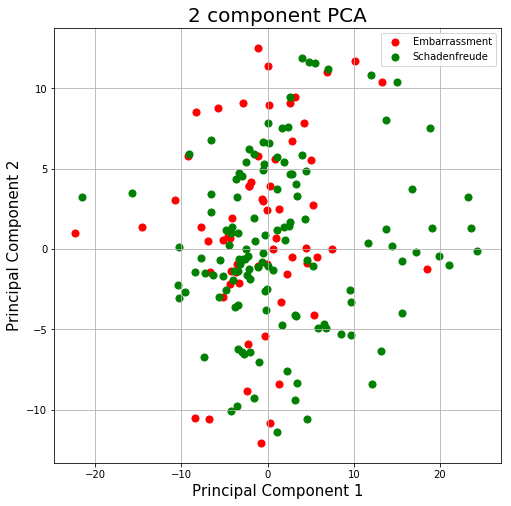

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Embarrassment', 'Schadenfreude']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Merged Emotion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Courtesy vs. Schadenfreude

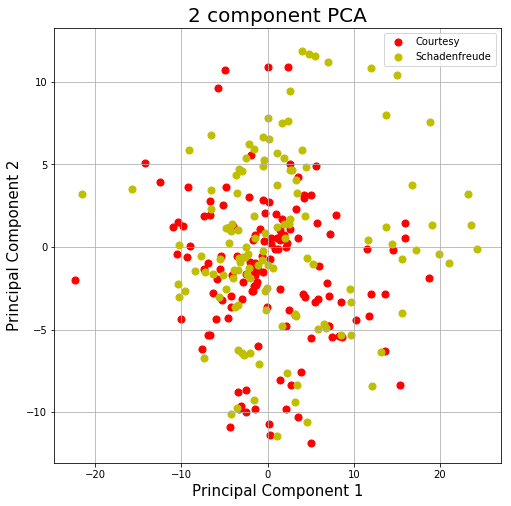

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Courtesy', 'Schadenfreude']
colors = ['r', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Merged Emotion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### So Schadenfreude seems to have greater variance (more extreme values on these PCs)

### Courtesy vs. Embarrassment

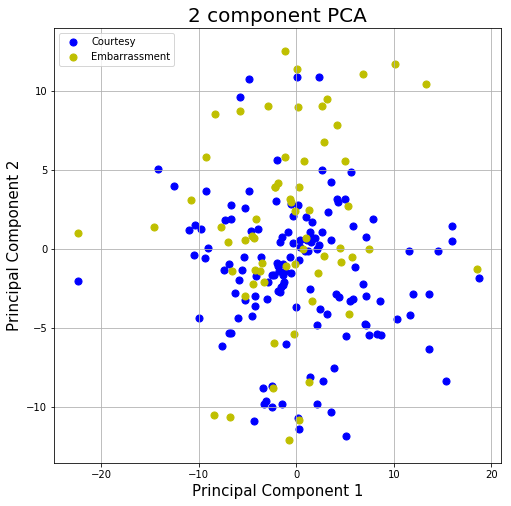

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Courtesy', 'Embarrassment']
colors = ['b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Merged Emotion'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Embarrassment higher on one PC than courtesy and smaller range on the other.

### Plot of Clusters vs. Arousal

In [38]:
finalDf = pd.concat([principalDf, y], axis = 1)

finalDf.head()

,principal component 1,principal component 2,Merged Arousal
0,-4.169323,-5.522611,1
1,-3.061791,-7.201522,1
2,5.281954,0.087207,2
3,-0.987631,-7.062282,1
4,-2.094031,-6.403348,1


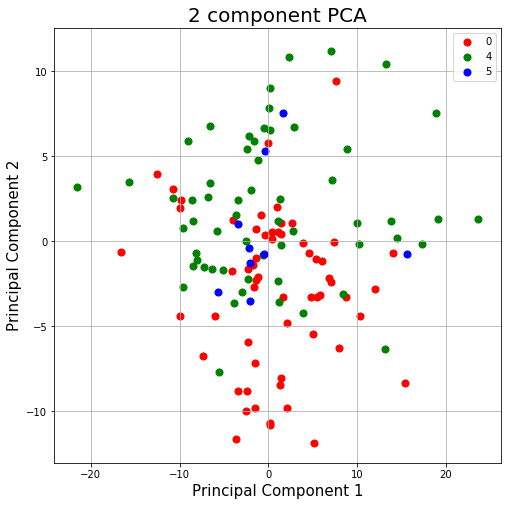

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,4,5]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Merged Arousal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Plot of Clusters vs. Dominance

In [42]:
finalDf = pd.concat([principalDf, y1], axis = 1)

finalDf.head()

,principal component 1,principal component 2,Merged Dominance
0,-4.169323,-5.522611,1
1,-3.061791,-7.201522,1
2,5.281954,0.087207,2
3,-0.987631,-7.062282,1
4,-2.094031,-6.403348,2


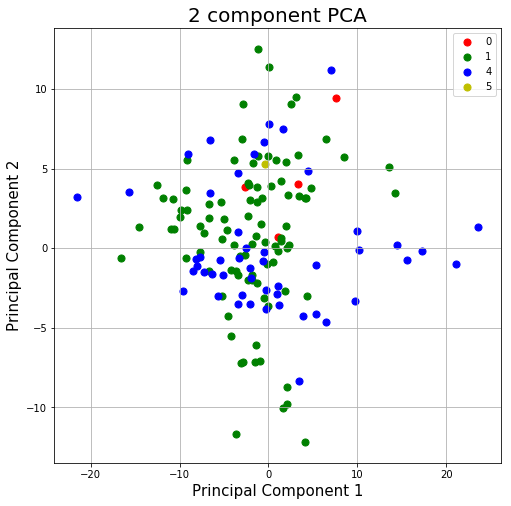

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0,1,4,5]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Merged Dominance'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Arousal and Dominance show signs of a weak clustering

#### Facial points will thus likely be useful feature

In [58]:
## Code templates (especially plotting) from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)